**Réalisé par Gael AHOUANVOEDO**

**🚀 Salaire des professionnels du Logiciel 📊 Kaggle 📈**

**08 Juin 2022**

# **<center><span style="color:#01c9e0;">🚀 SALAIRE DES PROFESSIONNELS DU LOGICIEL  🚀   </span></center>**
## <center>Pour plus d'informations contctez moi sur Slack 👍</center>

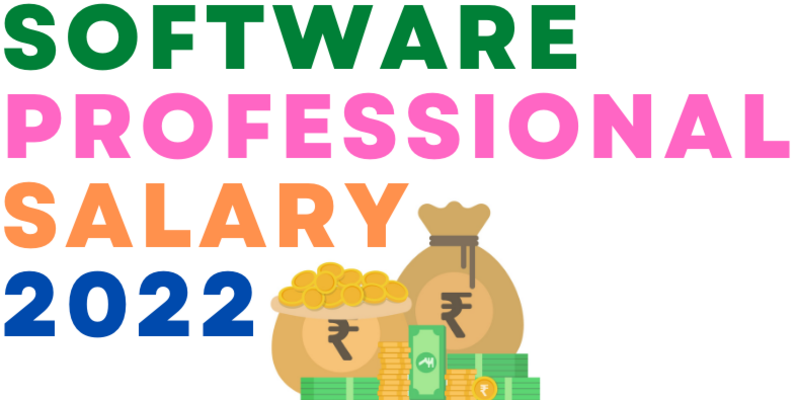

# **<span style="color:#01c9e0;">Table des matières  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analyse](#4)
- [5. Conclusion](#5)

<a id="1"></a>
# **<center><span style="color:#01c9e0;">Introduction  </span></center>**

### Dans ce projet, je dois exploiter un ensemble de données contenant des informations sur plus de 22700 professionnels du logiciel avec différentes caractéristiques telles que leurs salaires (₹), le nom de l'entreprise, l'évaluation de l'entreprise, le nombre de fois que les salaires ont été déclarés et l'emplacement de l'entreprise.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#01c9e0;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#01c9e0;"> Data Wrangling </span></center>**

In [2]:
data = pd.read_csv('Software_Professional_Salaries.csv')
df = data.copy()

### Tout d'abord, nous allons faire une vue de notre ensemble de données pour voir les différents problèmes.

In [3]:
df.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
21784,3.8,Thomson Reuters,Web Developer,300000,9,Bangalore
1624,3.9,Publicis Sapient,Android Developer,800000,2,New Delhi
2930,4.0,Entrata India,Software Engineer - Android,700000,1,Pune
18664,3.8,Leveraged Growth,Software Development Engineer (SDE),500000,1,New Delhi
7490,4.0,Mitron TV,Senior IOS Developer,2400000,1,Bangalore


In [4]:
df.shape

(22774, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22774 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


### Notre jeu de données ne contient aucune valeur manquante.

### Renomons les colonnes avec des espaces dans le nom

In [6]:
df = df.rename(columns = {'Company Name':'Company', 'Job Title':'Job','Salaries Reported':'Reported'})

### Toutes les valeurs de salaire doivent être d'au moins 150 roupies, ce qui équivaut au salaire minimum en Inde. vérifions

In [7]:
df.query('Salary<150')

,Rating,Company,Job,Salary,Reported,Location


### Nous n'avons aucune ligne, ce qui est bon. Le salaire doit être déclaré au moins une fois

In [8]:
df.query('Reported<1')

,Rating,Company,Job,Salary,Reported,Location


### Notre jeu de données est propre, nous allons enregistrer la nouvelle version de celui-ci dans un fichier CSV

In [9]:
df.to_csv('dataset.csv')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#01c9e0;"> Exploratory Data Analysis </span></center>**

### Définir des valeurs de style pour toutes nos visualisations

In [10]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('tab10')

## Company 

In [11]:
df['Company'].nunique()

11263

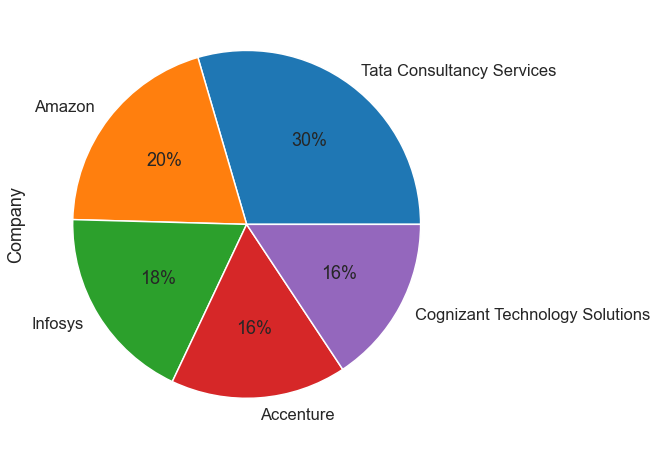

In [12]:
plt.figure(figsize=(10,8))
df['Company'].value_counts().head(5).plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.show()

> ### Tata Consultancy Services est l'entreprise la plus notée dans l'ensemble de données. Il est suivi par Aamazon, Infosys, Accenture et Cognizant Technology Solutions.

## Job 

In [13]:
df['Job'].nunique()

1084

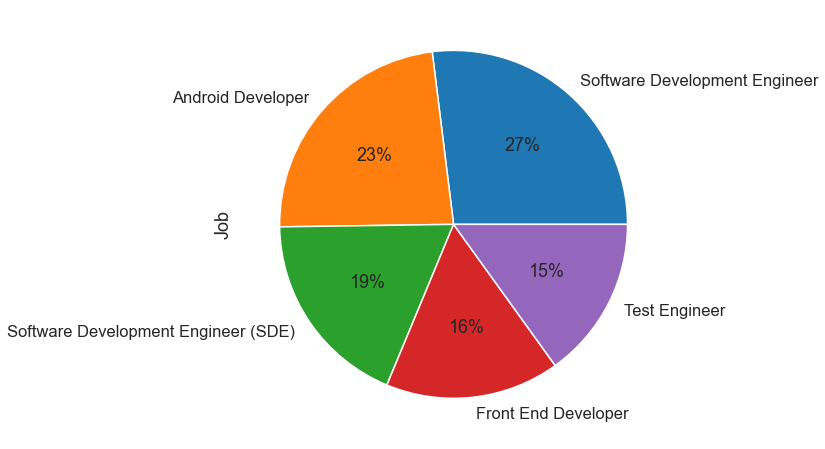

In [14]:
plt.figure(figsize=(10,8))
df['Job'].value_counts().head(5).plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.show()

> ### Les Software Development Egineer sont les plus nombreux à donner des informations sur le site. Ils sont suivis par les Android Developer, Software Development Engineer, Front End Developper et Test Engineer.

## Salary

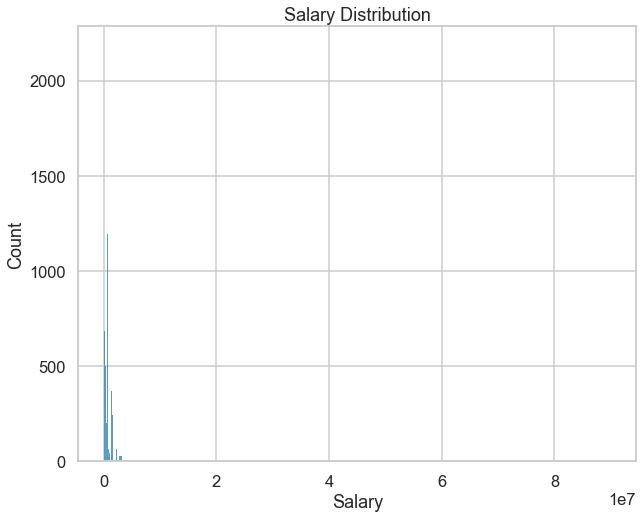

In [15]:
plt.figure(figsize=(10,8))
plt.title('Salary Distribution')
sns.histplot(df['Salary'], palette=colors)
plt.show()

### Dans Salaire, nous avons trop de valeurs aberrantes. Nous allons couper notre ensemble de données en deux groupes et explorer chaque groupe

In [16]:
df_salary = df.query('Salary < 3000000')['Salary']

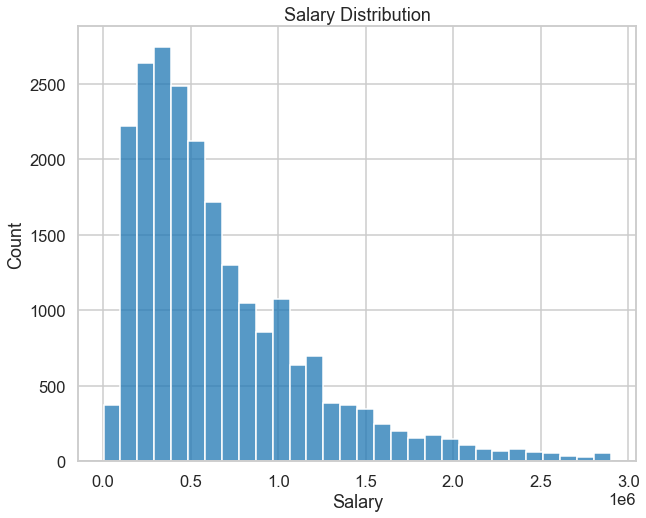

In [17]:
plt.figure(figsize=(10,8))
plt.title('Salary Distribution')
sns.histplot(df_salary, palette=colors, bins=30)
plt.show()

In [18]:
df_salary = df.query('Salary > 3000000')
df_salary.describe()

,Rating,Salary,Reported
count,238.000000,2.380000e+02,238.000000
mean,4.010084,4.693067e+06,3.974790
std,0.464321,5.790197e+06,24.659868
min,1.600000,3.100000e+06,1.000000
25%,3.800000,3.300000e+06,1.000000
50%,4.000000,3.700000e+06,1.000000
75%,4.300000,4.600000e+06,1.000000
max,5.000000,9.000000e+07,353.000000


In [19]:
print(f'Proportion of outliers in all datasets : {len(df_salary)/len(df)}')

Proportion of outliers in all datasets : 0.010450513743742864


> ### La plupart des travailleurs ont un faible salaire, si l'on considère leurs revenus entre eux. Nous avons 238 travailleurs avec un salaire très élevé autour de 3300000 et 4600000. Ils représentent 0.01% de tous les travailleurs.

## Salaries Reported

In [20]:
df['Reported'].min()

1

In [21]:
df['Reported'].max()

361

In [22]:
df['Reported'].mode()

0    1
Name: Reported, dtype: int64

## Location

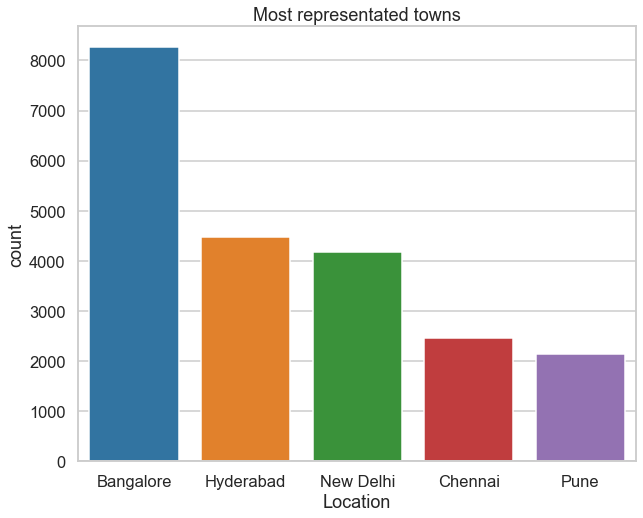

In [23]:
order2 = df.Location.value_counts().head(5).index.tolist()
plt.figure(figsize=(10,8))
plt.title('Most representated towns')
sns.countplot(df.Location, palette=colors, order=order2)
plt.show()

> ### La plupart des travailleurs viennent de Bangalore, Hyderabad, New Delhi, Chennai et Pune.

## Rating

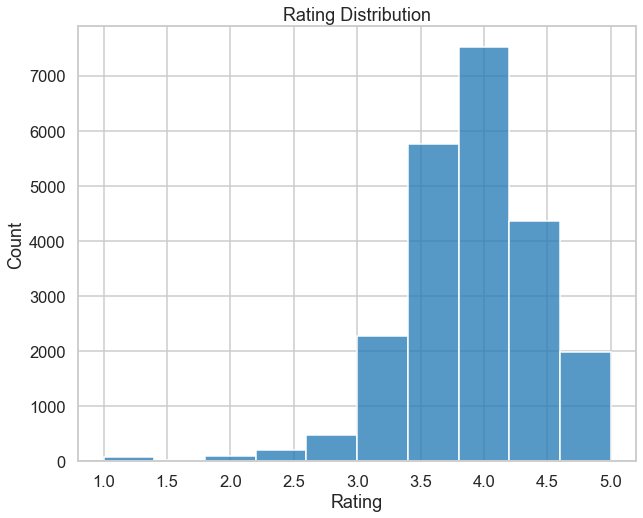

In [24]:
plt.figure(figsize=(10,8))
plt.title('Rating Distribution')
sns.histplot(df.Rating, palette=colors, bins=10)
plt.show()

> ### Les travailleurs donnent généralement une bonne note aux entreprises (élevée ou égale à 3) mais certains peuvent donner une très mauvaise note

### Nous allons maintenant répondre à quelques questions.

### `Quelles sont les meilleures entreprises du jeu de données ?`

### Pour faire une bonne étude, on ne peut pas prendre toutes les notes des entreprises et comparer leur moyenne. Certaines entreprises n'ont qu'une seule note alors que d'autres peuvent en avoir 10, 100 ou meme 200. Nous déterminerons donc un minimum de note dans un premier temps. Ce sont les entreprises qui auront au moins ce nombre minimum de notation que nous comparerons

In [25]:
df_comp = df.Company.value_counts()

In [26]:
df_comp = pd.DataFrame(df_comp)
df_comp = df_comp.reset_index()
df_comp = df_comp.rename(columns={'index':'Company','Company':'count'})
df_comp

,Company,count
0,Tata Consultancy Services,271
1,Amazon,184
2,Infosys,169
3,Accenture,150
4,Cognizant Technology Solutions,144
...,...,...
11258,Talent Anywhere,1
11259,WisdmLabs,1
11260,Softdel,1
11261,Dentsu,1


### Ainsi, considérant le nombre de note recu, j'opterai pour un minimum de 11 notes simplement parceque une PME devrait avoir à minima 11 employés. On élimine ainsi tous ce qui pourrait etre TPE dans notre ensemble. En effet, il serait pas intéressant de comparer des TPE à des géants comme Amazon en se basant uniquement sur la recommendation des employés.

In [27]:
df_comp = df_comp.query('count>=11')
df_comp

,Company,count
0,Tata Consultancy Services,271
1,Amazon,184
2,Infosys,169
3,Accenture,150
4,Cognizant Technology Solutions,144
...,...,...
199,Razorpay,11
200,Self,11
201,Brillio,11
202,Paytm Money,11


In [28]:
df_comp.drop(['count'], axis=1,inplace=True)
df_comp

,Company
0,Tata Consultancy Services
1,Amazon
2,Infosys
3,Accenture
4,Cognizant Technology Solutions
...,...
199,Razorpay
200,Self
201,Brillio
202,Paytm Money


### Nous allons fusionner ce jeu de données avec le jeu de données de base  pour récupérer uniquement la notation des entreprises choisies

In [29]:
df_comp = df_comp.merge(df, on = 'Company',how='inner')
df_comp

,Company,Rating,Job,Salary,Reported,Location
0,Tata Consultancy Services,3.9,Senior Android Developer,400000,2,Bangalore
1,Tata Consultancy Services,3.9,Android Applications Developer,360000,1,Bangalore
2,Tata Consultancy Services,3.9,Android Engineer,1000000,1,Bangalore
3,Tata Consultancy Services,3.9,Android Test Engineer,200000,1,Bangalore
4,Tata Consultancy Services,3.9,Android Developer,288000,1,Chennai
...,...,...,...,...,...,...
5578,Urban Company,3.9,Software Development Engineer - Intern,540000,3,New Delhi
5579,Urban Company,3.9,Software Development Engineer (SDE),1200000,8,New Delhi
5580,Urban Company,3.9,Software Development Engineer I,1500000,4,New Delhi
5581,Urban Company,3.9,Software Development Engineer III,3000000,4,New Delhi


### Biinngooo !!!! Maintenant, nous pouvons regrouper les notes des entreprises pour déterminer la moyenne

In [30]:
df_comp = df_comp.groupby('Company')['Rating'].mean().sort_values(ascending=False)

### Et les meilleures entreprises sont :

In [31]:
df_comp = pd.DataFrame(df_comp)
df_comp = df_comp.reset_index()
df_comp.query('Rating>=4.2')

,Company,Rating
0,MindTickle,4.700000
1,Fynd,4.600000
2,Intuit,4.600000
3,Google,4.500000
4,Zoho,4.500000
5,JUSPAY,4.500000
6,Akamai,4.500000
7,ShareChat,4.400000
8,Head Digital Works,4.400000
9,Microsoft,4.400000


### `Quel est le salaire pour chaque emploi ?`

### Alors, rappelez-vous que nous avons de nombreuses valeurs aberrantes. Nous pouvons explorer certaines lignes des valeurs aberrantes pour voir si nous pouvons identifier certains indices qui peuvent nous aider à les traiter

In [32]:
df.Salary.sort_values(ascending=False)

18639    90000000
4473     10000000
9262     10000000
7123     10000000
5821      9900000
           ...   
10318       12000
16842       12000
5550        12000
9939         8448
22567        2112
Name: Salary, Length: 22774, dtype: int64

In [33]:
df.iloc[18639]

Rating                                      3.6
Company                       Thapar University
Job         Software Development Engineer (SDE)
Salary                                 90000000
Reported                                      1
Location                              New Delhi
Name: 18639, dtype: object

In [34]:
df.iloc[4473]

Rating                                3.8
Company                        Concentrix
Job         Oracle Database Administrator
Salary                           10000000
Reported                                1
Location                        Bangalore
Name: 4473, dtype: object

In [35]:
df.iloc[9262]

Rating                        3.6
Company         OASYS Cybernetics
Job         Senior Java Developer
Salary                   10000000
Reported                        1
Location                  Chennai
Name: 9262, dtype: object

In [36]:
df.iloc[7123]

Rating                             3.5
Company                 Koru UX Design
Job         Senior Front End Developer
Salary                        10000000
Reported                             1
Location                          Pune
Name: 7123, dtype: object

### Difficile de tirer une conclusion. Mais on remarque que ce sont des salaires qui ont été déclaré une seule fois. Cependant nous les supprimons pas car rien ne prouve qu'ils sont faux mais en plus il peut s'agit de salaire pour Job Senior. Sinon, comme avant, nous pouvons filtrer le nombre de job avec un certain nombre d'occurrences

In [37]:
len(df)/df.Job.nunique()

21.009225092250922

### Ainsi, pour une activité ayant au moins 21 salaires déclarés, nous déterminerons la moyenne

In [38]:
df_job = df.Job.value_counts()
df_job = pd.DataFrame(df_job)
df_job = df_job.reset_index()
df_job = df_job.rename(columns={'index':'Job','Job':'count'})
df_job

,Job,count
0,Software Development Engineer,2351
1,Android Developer,2029
2,Software Development Engineer (SDE),1614
3,Front End Developer,1412
4,Test Engineer,1314
...,...,...
1079,Java and J2EE Developer,1
1080,Techlead Java,1
1081,Java Andriod Developer,1
1082,Java Deceloper,1


In [39]:
df_job = df_job.query('count>=21')
df_job

,Job,count
0,Software Development Engineer,2351
1,Android Developer,2029
2,Software Development Engineer (SDE),1614
3,Front End Developer,1412
4,Test Engineer,1314
...,...,...
91,Software Development Engineer (SDE) - Contractor,23
92,Oracle Applications Database Administrator,22
93,IOS Development,21
94,Test Lead,21


In [40]:
df_job.drop(['count'], axis=1,inplace=True)

### Et fusionner le jeu de données avec le jeu de données de base

In [41]:
df_job = df_job.merge(df, on = 'Job',how='inner')
df_job

,Job,Rating,Company,Salary,Reported,Location
0,Software Development Engineer,4.1,Shell,156000,1,Bangalore
1,Software Development Engineer,4.3,314e,180000,1,Bangalore
2,Software Development Engineer,3.1,Conduent,300000,1,Bangalore
3,Software Development Engineer,4.9,MMACH Design,500000,1,Bangalore
4,Software Development Engineer,4.3,Intel Corporation,1200000,1,Bangalore
...,...,...,...,...,...,...
20085,SDE-2 Backend,3.8,Amazon,3300000,1,Hyderabad
20086,SDE-2 Backend,4.3,BA Continuum India,1500000,1,Hyderabad
20087,SDE-2 Backend,4.0,Phenom,3200000,1,Hyderabad
20088,SDE-2 Backend,4.7,MindTickle,3100000,1,Pune


In [42]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

### Enfin, nous avons le salaire de chaque emploi trié du haut vers le bas

In [43]:
df_job = df_job.groupby('Job')['Salary'].mean().sort_values(ascending=False)
df_job = pd.DataFrame(df_job)
df_job = df_job.reset_index()
df_job

,Job,Salary
0,Software Development Engineer III,2196000
1,Senior Backend Engineer,2194667
2,SDE-2 Backend,2176190
3,Lead Software Development Engineer,1844824
4,Sr Software Development Engineer,1668000
...,...,...
91,Android Developer - Intern,250800
92,Web Developer - Intern,244644
93,Front End Developer - Intern,231192
94,Backend Process,222000


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#01c9e0;"> Conclusion </span></center>**

### `Quelles sont les meilleures entreprises du jeu de données ?`

### Les meilleures entreprises sont :

In [44]:
df_comp.query('Rating>=4.2')

,Company,Rating
0,MindTickle,5
1,Fynd,5
2,Intuit,5
3,Google,4
4,Zoho,4
5,JUSPAY,4
6,Akamai,4
7,ShareChat,4
8,Head Digital Works,4
9,Microsoft,4


### `Quel est le salaire pour chaque emploi ?`

### Le salaire de chaque emploi trié du plus haut au plus bas

In [45]:
df_job

,Job,Salary
0,Software Development Engineer III,2196000
1,Senior Backend Engineer,2194667
2,SDE-2 Backend,2176190
3,Lead Software Development Engineer,1844824
4,Sr Software Development Engineer,1668000
...,...,...
91,Android Developer - Intern,250800
92,Web Developer - Intern,244644
93,Front End Developer - Intern,231192
94,Backend Process,222000


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>